In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms

%matplotlib inline
#from neurodynex3.competing_populations import decision_making

"""
A simple example to get started.
Returns:

"""

'\nA simple example to get started.\nReturns:\n\n'

In [4]:
def network_by_w_pos(w_pos_value):
    stim_start = 0. * b2.ms
    stim_duration = 0 * b2.ms
    print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))

    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                          t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                          coherence_level=+0.0, w_pos=w_pos_value, mu0_mean_stimulus_Hz=250 * b2.Hz,
                                          max_sim_time=2000. * b2.ms)
    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                     results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                     sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                     results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                     sup_title="Right")
    
    return results


    

stimulus start: 0.0, stimulus end: 0.0
simulating 426 neurons. Start: Mon Jul 18 01:00:51 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Mon Jul 18 01:01:51 2022


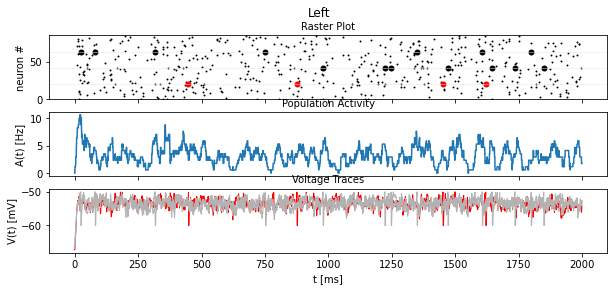

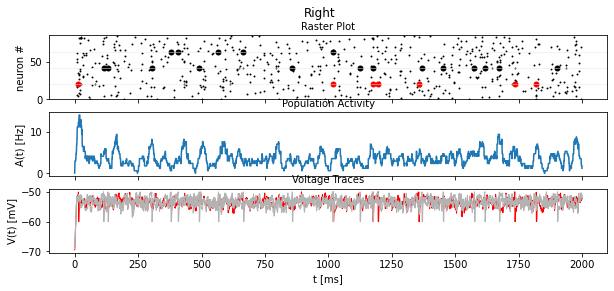

In [5]:
sim_result = network_by_w_pos(1.0)

In [6]:
def rmp_ave(results):
	rmp_A = results["voltage_monitor_A"]
	rmp_B = results["voltage_monitor_B"]
	n_time = len(rmp_A[0].v)	
	n_sample_cells = np.shape(rmp_A)[0]
	rmp_mat_A = np.zeros([n_sample_cells, n_time])
	rmp_mat_B = np.zeros([n_sample_cells, n_time])


	for i in range(n_sample_cells):
	    rmp_mat_A[i,:] = rmp_A[i].v/b2.mV
	    rmp_mat_B[i,:] = rmp_B[i].v/b2.mV
	    
	rmp_mat_A_ave=(rmp_mat_A.mean(axis=0))
	rmp_mat_B_ave=(rmp_mat_B.mean(axis=0))
	rmp_mean_A = rmp_mat_A_ave.mean()
	rmp_mean_B = rmp_mat_B_ave.mean()
	return rmp_mean_A, rmp_mean_B







In [10]:
rmp_means = rmp_ave(sim_result)


In [9]:
ave_rmp_dic = {}

In [11]:
ave_rmp_dic['1.0'] = rmp_means

In [12]:
ave_rmp_dic

{'1.0': (-53.60147099220637, -53.615991644605764)}

In [18]:
ave_rmp_dic[w_pos_steps[1]] = rmp_means

In [19]:
ave_rmp_dic

{'1.0': (-53.60147099220637, -53.615991644605764),
 1.1: (-53.60147099220637, -53.615991644605764)}

In [17]:
w_pos_steps = np.arange(1,2.6,0.1)

In [21]:
w_pos_steps[:2]

array([1. , 1.1])

In [ ]:
ave_rmp_dic = {}
for w_pos_step in w_pos_steps:
    print(w_pos_step)
    sim_result = network_by_w_pos(w_pos_step)
    rmp_means = rmp_ave(sim_result)
    ave_rmp_dic[w_pos_step] = rmp_means
    


    
    

1.0
stimulus start: 0.0, stimulus end: 0.0
simulating 426 neurons. Start: Mon Jul 18 01:12:56 2022
sim end: Mon Jul 18 01:14:08 2022
1.1
stimulus start: 0.0, stimulus end: 0.0
simulating 426 neurons. Start: Mon Jul 18 01:14:08 2022
sim end: Mon Jul 18 01:15:01 2022
1.2000000000000002
stimulus start: 0.0, stimulus end: 0.0
simulating 426 neurons. Start: Mon Jul 18 01:15:01 2022


In [25]:
ave_rmp_dic

{}